In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_continuous, norm, multivariate_normal, kstest, skew, kurtosis

# Задача №6


In [2]:
sigma = 2.0
N = 200000
rng = np.random.default_rng(42)

# 1) генерируем R и Theta
R = rng.rayleigh(scale=sigma, size=N)
Theta = rng.uniform(0, 2*np.pi, size=N)

# 2) строим X, Y
X = R * np.cos(Theta)
Y = R * np.sin(Theta)

# 3) базовые статистики
print("Эмпирика (приближённо):")
print(f" E[X] = {X.mean():.5f}, Var[X] = {X.var(ddof=0):.5f}")
print(f" E[Y] = {Y.mean():.5f}, Var[Y] = {Y.var(ddof=0):.5f}")
print(f" Cov(X,Y) = {np.cov(X, Y, ddof=0)[0,1]:.5e}")
print(f" Corr(X,Y) = {np.corrcoef(X, Y)[0,1]:.5e}")

# 4) тест на нормальность маргиналей (Kolmogorov-Smirnov для нормализованных данных)
x_std = (X - X.mean()) / X.std(ddof=0)
y_std = (Y - Y.mean()) / Y.std(ddof=0)
print("\nKS test vs N(0,1):")
print(" X:", kstest(x_std, 'norm'))
print(" Y:", kstest(y_std, 'norm'))

Эмпирика (приближённо):
 E[X] = -0.00323, Var[X] = 3.98360
 E[Y] = 0.00167, Var[Y] = 4.00882
 Cov(X,Y) = 1.29168e-03
 Corr(X,Y) = 3.23229e-04

KS test vs N(0,1):
 X: KstestResult(statistic=np.float64(0.001206741621792129), pvalue=np.float64(0.9324626250474086), statistic_location=np.float64(-0.022845538221216488), statistic_sign=np.int8(-1))
 Y: KstestResult(statistic=np.float64(0.0015840678602079272), pvalue=np.float64(0.6965587339109639), statistic_location=np.float64(0.7382901748254644), statistic_sign=np.int8(1))


Гистограммы маргиналей + теоретические плотности N(0, $sigma^2$)


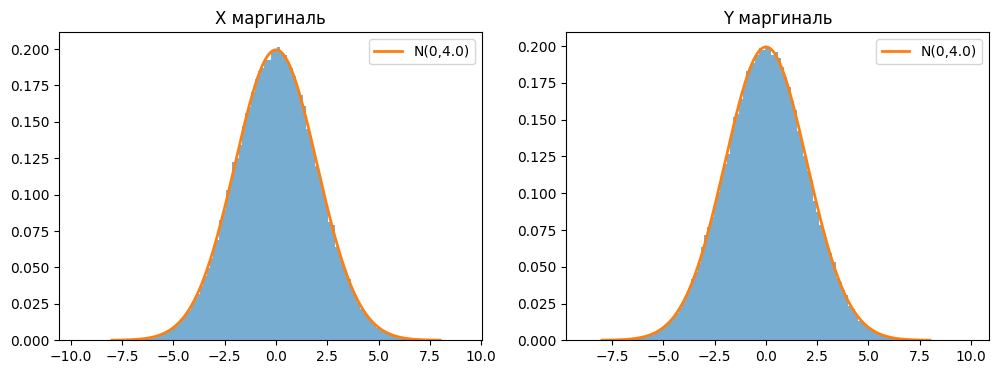

In [3]:
xs = np.linspace(-4*sigma, 4*sigma, 400)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(X, bins=120, density=True, alpha=0.6)
plt.plot(xs, norm.pdf(xs, loc=0, scale=sigma), lw=2, label=f'N(0,{sigma**2})')
plt.title('X маргиналь')
plt.legend()

plt.subplot(1,2,2)
plt.hist(Y, bins=120, density=True, alpha=0.6)
plt.plot(xs, norm.pdf(xs, loc=0, scale=sigma), lw=2, label=f'N(0,{sigma**2})')
plt.title('Y маргиналь')
plt.legend()
plt.show()

scatter (часть точек) и уровни теоретической плотности двумерной нормали

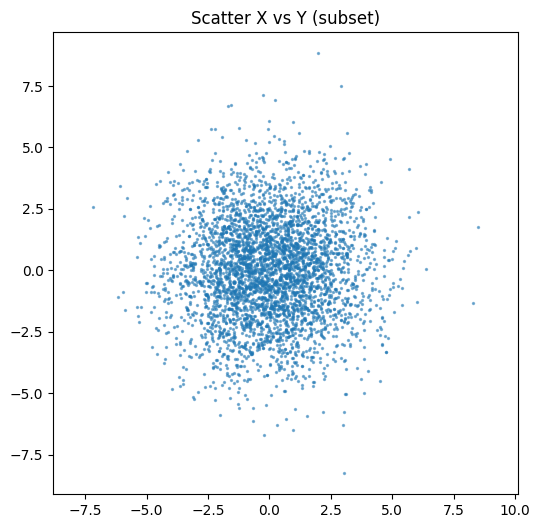

In [4]:
plt.figure(figsize=(6,6))
sel = rng.choice(N, size=4000, replace=False)
plt.scatter(X[sel], Y[sel], s=2, alpha=0.5)
plt.axis('equal')
plt.title('Scatter X vs Y (subset)')
plt.show()

 Сравнение эмпирической 2D плотности и теоретической

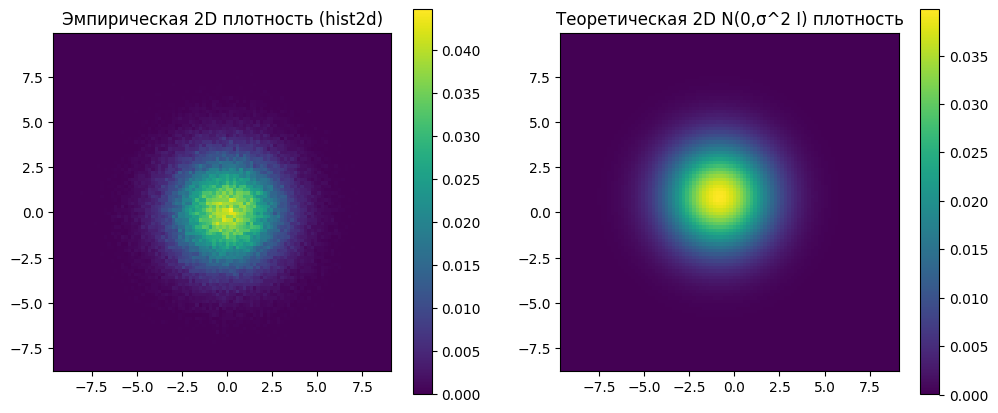

Средняя абсолютная разность (grid): 1.35998e-03, макс разность: 1.72819e-02


In [5]:
# эмпирическая 2D гистограмма (нормализованная)
xbins = 100
ybins = 100
H, xedges, yedges = np.histogram2d(X, Y, bins=[xbins, ybins], density=True)
xcenters = 0.5*(xedges[:-1] + xedges[1:])
ycenters = 0.5*(yedges[:-1] + yedges[1:])
Xc, Yc = np.meshgrid(xcenters, ycenters, indexing='xy')

# теоретическая двумерная нормаль с нулём и ковариация sigma^2 * I
rv = multivariate_normal(mean=[0,0], cov=[[sigma**2, 0],[0, sigma**2]])
pdf_theor = rv.pdf(np.column_stack([Xc.ravel(), Yc.ravel()])).reshape(Xc.shape)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(H.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='equal')
plt.title('Эмпирическая 2D плотность (hist2d)')
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(pdf_theor.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='equal')
plt.title('Теоретическая 2D N(0,σ^2 I) плотность')
plt.colorbar()
plt.show()

# 8) метрика соответствия: средняя абсолютная разность на сетке
diff = np.abs(H - pdf_theor)
print(f"Средняя абсолютная разность (grid): {diff.mean():.5e}, макс разность: {diff.max():.5e}")